In [10]:
import pandas as pd
import plotnine as pn

In [11]:
df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=every/num_states=2/epochs=10000.0/batch_size=3/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_three/num_states=4/epochs=10000.0/batch_size=3/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=7/epochs=1000/batch_size=8/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=1000/batch_size=8/lr=0.001/losses.csv")
df

,train_losses,train_accuracies,test_losses,test_accuracies,epoch
0,25.662070,0.322581,28.247985,0.250000,1
1,25.810504,0.322581,28.238068,0.250000,2
2,25.958568,0.322581,28.227989,0.250000,3
3,25.793122,0.322581,26.902109,0.250000,4
4,25.941121,0.322581,26.892847,0.250000,5
...,...,...,...,...,...
1648,16.806681,0.483871,17.577466,0.535714,1649
1649,16.809582,0.483871,24.207018,0.535714,1650
1650,16.811903,0.483871,17.577065,0.535714,1651
1651,16.808922,0.483871,24.207167,0.535714,1652


In [12]:
# one 'loss' df
df_curves = pd.DataFrame(
    zip(
        pd.concat([df["train_losses"], df["test_losses"]]),
        pd.concat([df["train_accuracies"], df["test_accuracies"]]),
        ["train"] * len(df) + ["test"] * len(df),
        pd.concat([df["epoch"], df["epoch"]])
    ),
    columns=["loss", "accuracy", "set", "epoch"],
    )
df_curves

,loss,accuracy,set,epoch
0,25.662070,0.322581,train,1
1,25.810504,0.322581,train,2
2,25.958568,0.322581,train,3
3,25.793122,0.322581,train,4
4,25.941121,0.322581,train,5
...,...,...,...,...
3301,17.577466,0.535714,test,1649
3302,24.207018,0.535714,test,1650
3303,17.577065,0.535714,test,1651
3304,24.207167,0.535714,test,1652


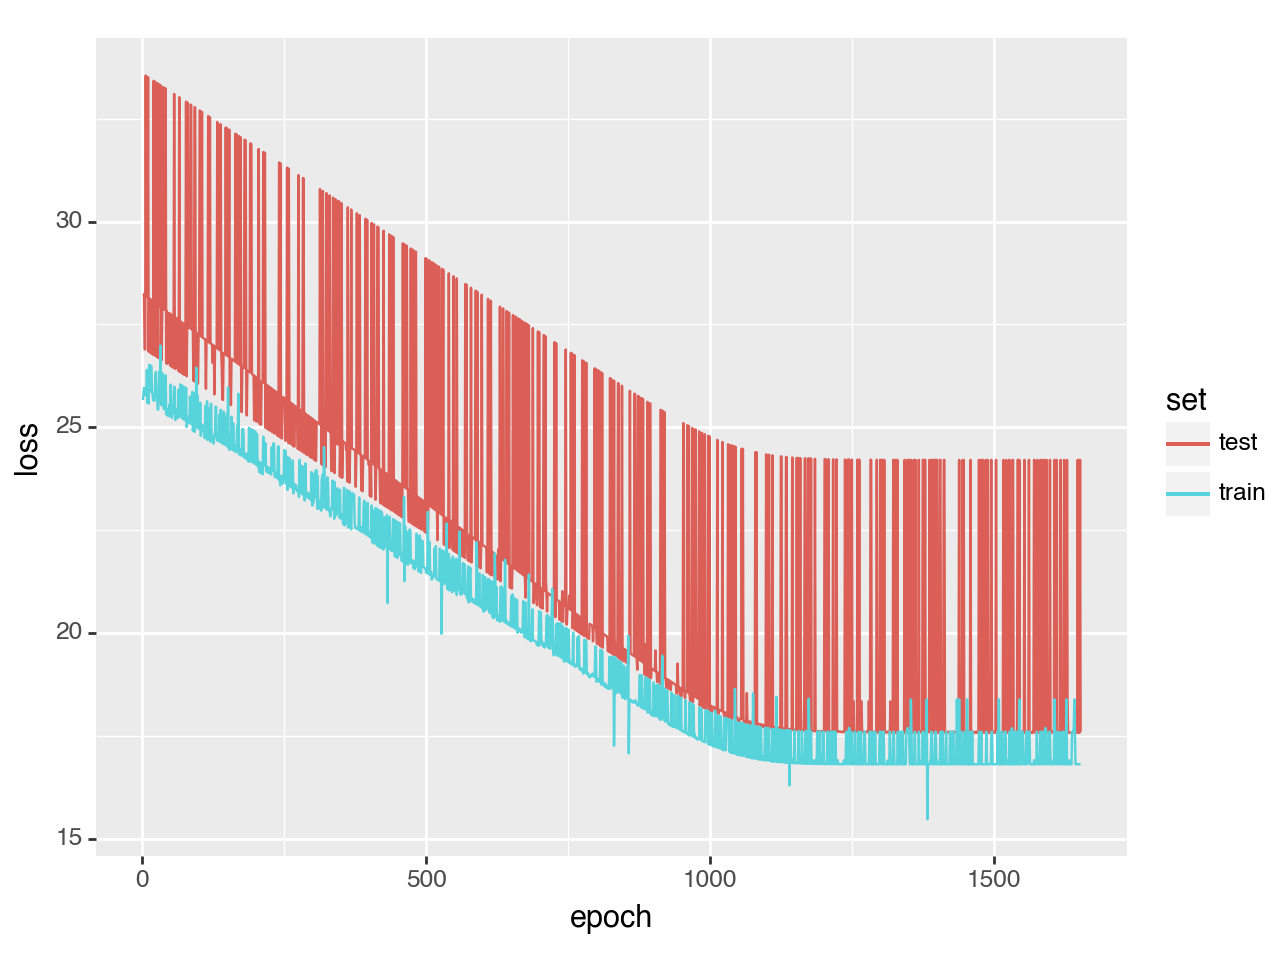

<Figure Size: (640 x 480)>

In [13]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

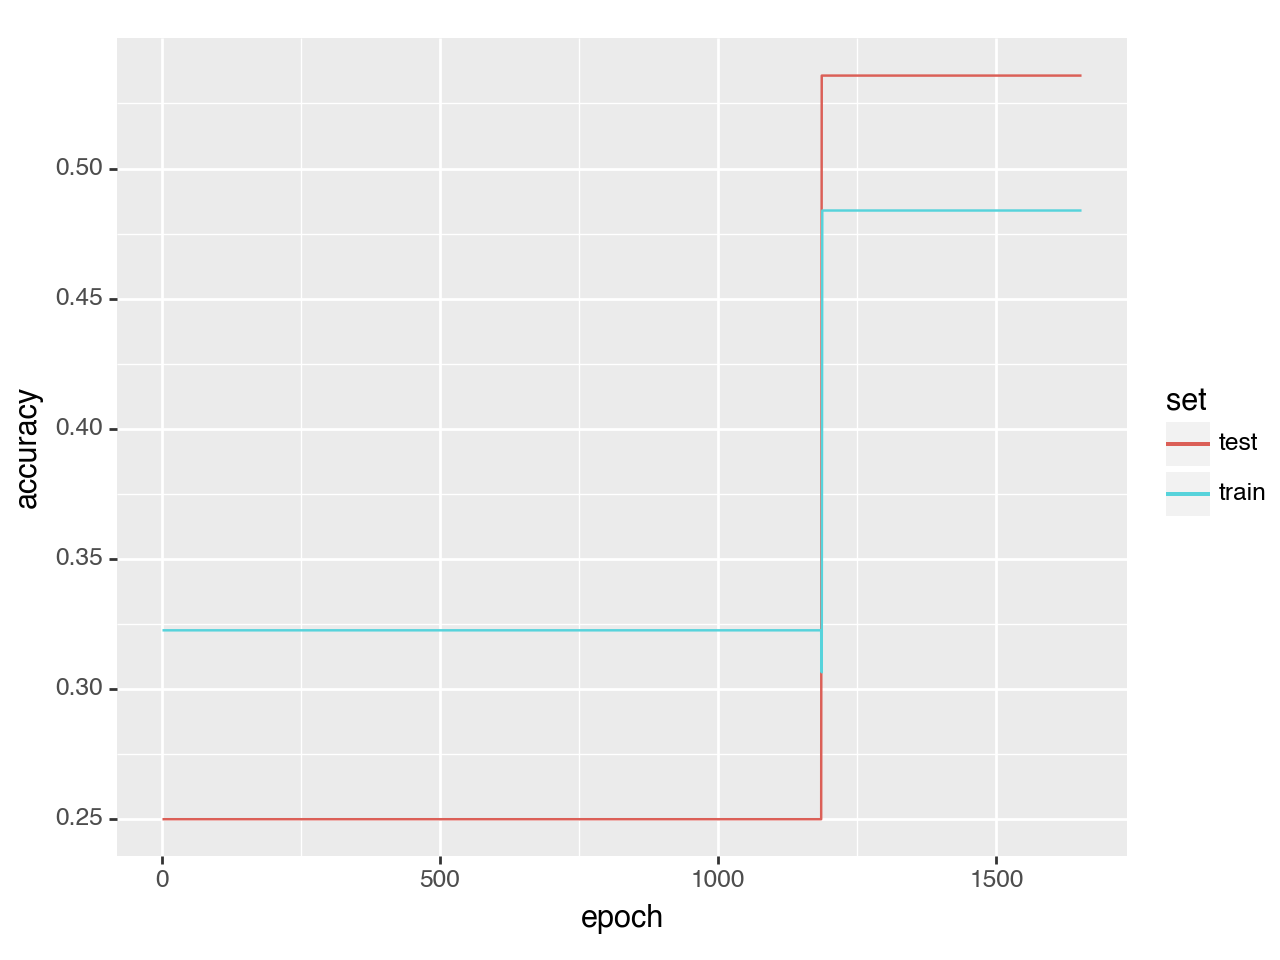

<Figure Size: (640 x 480)>

In [15]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

In [14]:
import torch
from qal.pfa import PFAModel

ModuleNotFoundError: No module named 'qal'

In [ ]:
model = PFAModel(2, [0,1])
model.load_state_dict(torch.load(PATH))
model.eval()